In [58]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np

In [64]:
# Load and preprocess the MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()



In [65]:
# Normalize the images to the range [0, 1] and expand dimensions to add a channel (1 for grayscale)
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

In [67]:
input_size=(28, 28, 1)
inputs = layers.Input(input_size)

print(inputs)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='input_4'), name='input_4', description="created by layer 'input_4'")


In [77]:
conv1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
print(conv1)
conv1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
conv2 = layers.Conv2D(1, (1, 1), activation='sigmoid')(conv1)
model_unet = models.Model(inputs=inputs, outputs=conv2)
model_unet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['sparse_categorical_accuracy'])


KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 32), dtype=tf.float32, name=None), name='conv2d_63/Relu:0', description="created by layer 'conv2d_63'")


In [78]:
model.fit(train_images, train_images, epochs=1, batch_size=64, validation_data=(test_images, test_images))




938/938 [==============================] - 149s 159ms/step - loss: 0.0592 - sparse_categorical_accuracy: 0.8088 - val_loss: 0.0589 - val_sparse_categorical_accuracy: 0.8072


In [61]:
# Define the U-Net model
def unet_model(input_size=(28, 28, 1)):
    inputs = layers.Input(input_size)
    

    # Encoder (contracting path)
    conv1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)#here we are downsampling stride 2 as mentioned in the paper
    #after downpooling we double the number of features
    conv2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    # Bottleneck
    conv3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)

    # Decoder (expanding path)
    up4 = layers.Conv2D(64, (2, 2), activation='relu', padding='same')(layers.UpSampling2D(size=(2, 2))(conv3))
    merge4 = layers.concatenate([conv2, up4], axis=3)
    conv4 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(merge4)#here i have bridged using merge4
    conv4 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv4)

    up5 = layers.Conv2D(32, (2, 2), activation='relu', padding='same')(layers.UpSampling2D(size=(2, 2))(conv4))
    merge5 = layers.concatenate([conv1, up5], axis=3)
    conv5 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(merge5)
    conv5 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(conv5)

    # Output layer
    conv6 = layers.Conv2D(1, (1, 1), activation='sigmoid')(conv5)

    model = models.Model(inputs=inputs, outputs=conv6)
    return model




In [73]:
# Instantiate and compile the model
model = unet_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['sparse_categorical_accuracy'])



In [74]:
# Train the model
model.fit(train_images, train_images, epochs=1, batch_size=64, validation_data=(test_images, test_images))


431/938 [============>.................] - ETA: 1:18 - loss: 0.0778 - sparse_categorical_accuracy: 0.8089

KeyboardInterrupt: 

In [ ]:
# Evaluate the model

loss, accuracy = model.evaluate(test_images, test_images)
accuracy=accuracy*100
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}%')
#81.4492% whith sigmoid loss dicrease is not that good after 1st epoch
#have used images itself because it is hard for reshaping it doesnt seem possible so comparing the whole image itself this migth cause accuracy to frob but it being 81.5 is very satisfactory
#softmac for the last layer is not giving a good accuracy even thoug loss drop is good at first
#unet has a pixel type softmax fuction and i am not awaye on how to call that in conv2d hence sigmoig has been used here

In [ ]:
# Predict on a test image
predicted_image = model.predict(test_images[:1])



In [ ]:
# Display original and predicted images
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

# Original image
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(test_images[0].reshape(28, 28), cmap='rainbow')

# Reconstructed image
plt.subplot(1, 3, 2)
plt.title("predicted Image")
plt.imshow(predicted_image[0].reshape(28, 28), cmap='rainbow')

plt.show()



In [54]:
predicted_image = model.predict(test_images[:70])

3/3 [==============================] - 0s 16ms/step


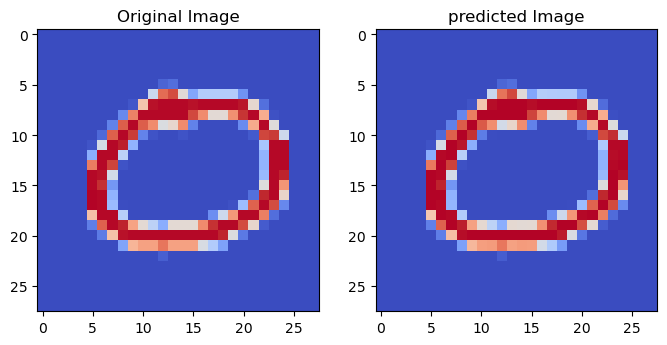

In [55]:
# Display original and predicted images
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

# Original image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(test_images[69].reshape(28, 28), cmap='coolwarm')

# Reconstructed image
plt.subplot(1, 2, 2)
plt.title("predicted Image")
plt.imshow(predicted_image[69].reshape(28, 28), cmap='coolwarm')

plt.show()
#this is not


In [56]:
# Define the U-Net model
def unet_model(input_size=(28, 28, 1)):
    inputs = layers.Input(input_size)

    # Encoder (contracting path)
    conv1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)#here we are downsampling stride 2 as mentioned in the paper
    #after downpooling we double the number of features
    conv2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    # Bottleneck
    conv3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)

    # Decoder (expanding path)
    up4 = layers.Conv2D(64, (2, 2), activation='relu', padding='same')(layers.UpSampling2D(size=(2, 2))(conv3))
    merge4 = layers.concatenate([conv2, up4], axis=3)
    conv4 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(merge4)
    conv4 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv4)

    up5 = layers.Conv2D(32, (2, 2), activation='relu', padding='same')(layers.UpSampling2D(size=(2, 2))(conv4))
    merge5 = layers.concatenate([conv1, up5], axis=3)
    conv5 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(merge5)
    conv5 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(conv5)

    # Output layer
    conv6 = layers.Conv2D(1, (1, 1), activation='logits')(conv5)

    model = models.Model(inputs=inputs, outputs=conv6)
    return model



In [57]:
# Instantiate and compile the model
model = unet_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

ValueError: Unknown activation function: 'logits'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.